In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

# Walkthrough

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df = df.dropna(axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


# Analysing Columns

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
for i in df.columns:
    print(f'Number of unique in {i} -', df[i].nunique())
    if df[i].nunique() < 50:
        print(f'\tUnique in {i} -', df[i].unique())
    print()

Number of unique in User_ID - 5891

Number of unique in Product_ID - 3623

Number of unique in Gender - 2
	Unique in Gender - ['F' 'M']

Number of unique in Age - 7
	Unique in Age - ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Number of unique in Occupation - 21
	Unique in Occupation - [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Number of unique in City_Category - 3
	Unique in City_Category - ['A' 'C' 'B']

Number of unique in Stay_In_Current_City_Years - 5
	Unique in Stay_In_Current_City_Years - ['2' '4+' '3' '1' '0']

Number of unique in Marital_Status - 2
	Unique in Marital_Status - [0 1]

Number of unique in Product_Category_1 - 18
	Unique in Product_Category_1 - [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]

Number of unique in Purchase - 17959



In [9]:
df['Purchase'].mean()

9333.859852635065

# Analysing Gender

Gender
F    132197
M    405380
dtype: int64


<Axes: title={'center': 'Gender Ratio'}>

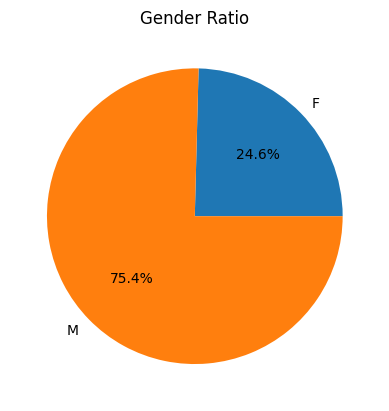

In [10]:
data = df.groupby('Gender').size()
print(data)
data.plot(kind='pie', autopct='%.1f%%', title = 'Gender Ratio')

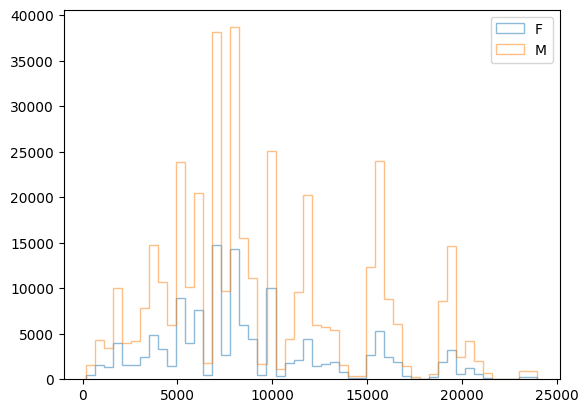

In [11]:
for name, group in df.groupby('Gender'):
    plt.hist(group['Purchase'], bins=50, alpha=0.5, label=name, histtype='step')
plt.legend()

<Axes: ylabel='Purchase'>

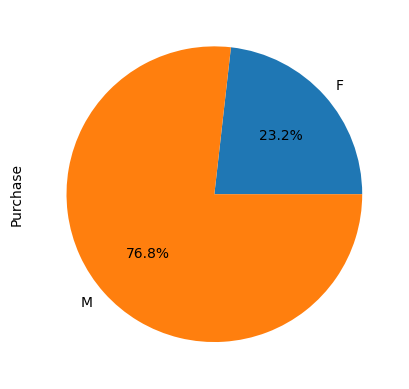

In [12]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie', autopct="%0.1f%%")

<Axes: ylabel='Purchase'>

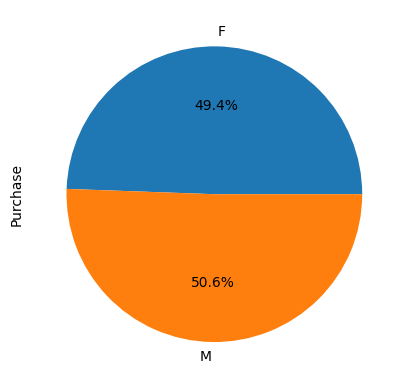

In [13]:
df.groupby('Gender')['Purchase'].median().plot(kind='pie', autopct="%0.1f%%")

# Analysing Age

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

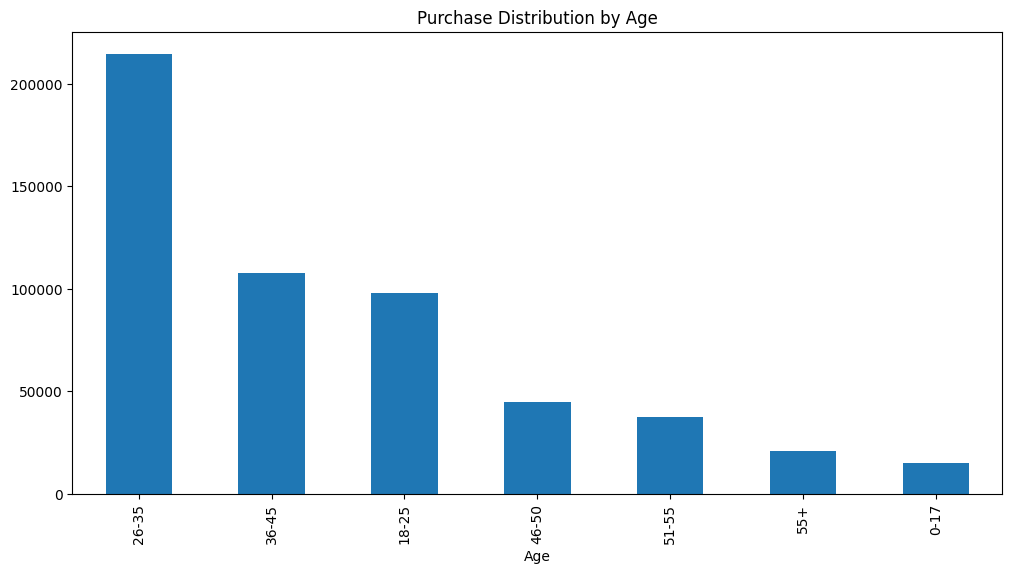

In [15]:
df['Age'].value_counts().plot(kind='bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<Axes: title={'center': 'Number of unique products bought by Age'}, xlabel='Age'>

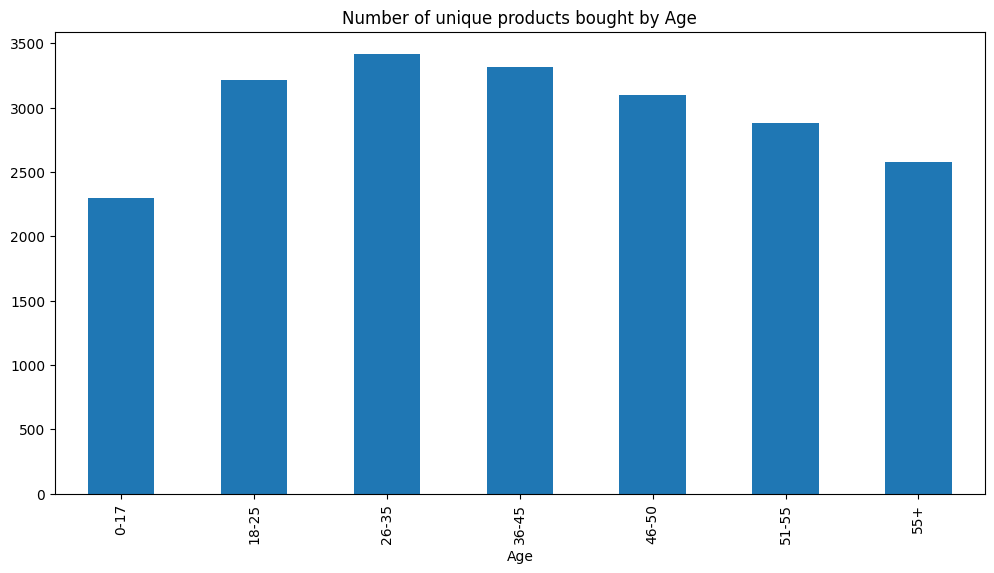

In [16]:
df.groupby('Age')['Product_ID'].nunique().plot(kind='bar', figsize = (12, 6), title = 'Number of unique products bought by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

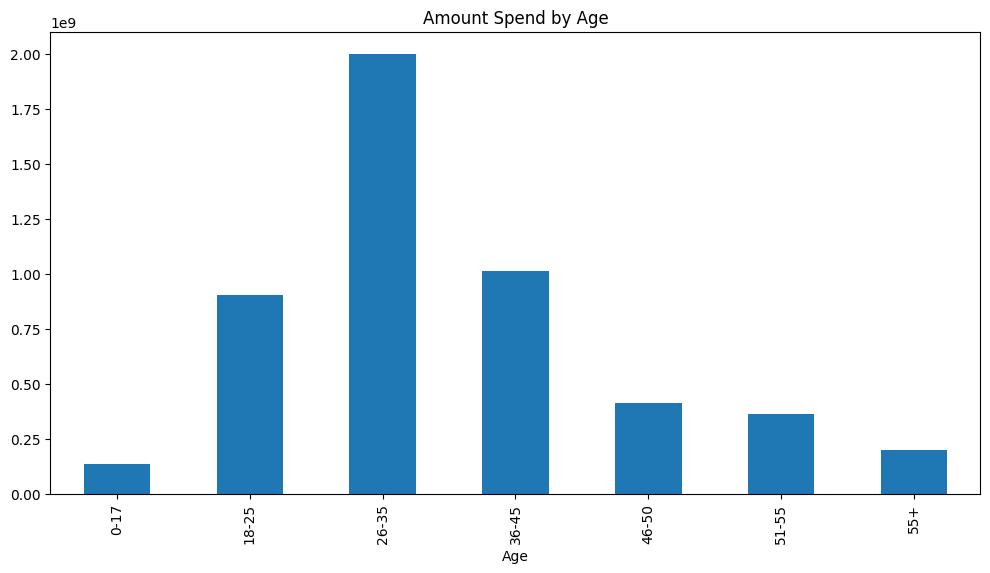

In [17]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar', figsize = (12, 6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Mean Amount Spend by Age'}, xlabel='Age'>

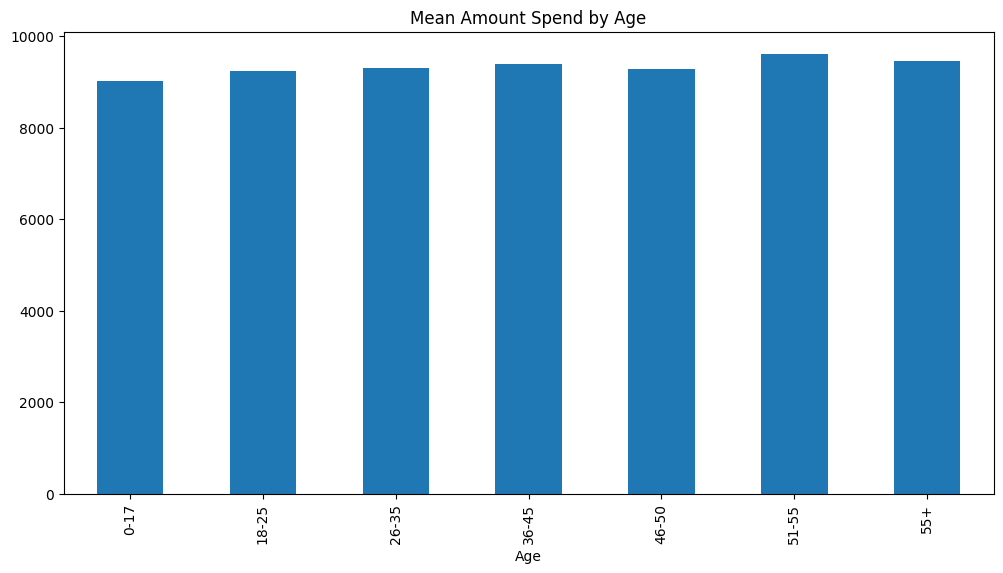

In [18]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar', figsize = (12, 6), title = 'Mean Amount Spend by Age')

# Analysing Marital Status

<Axes: ylabel='count'>

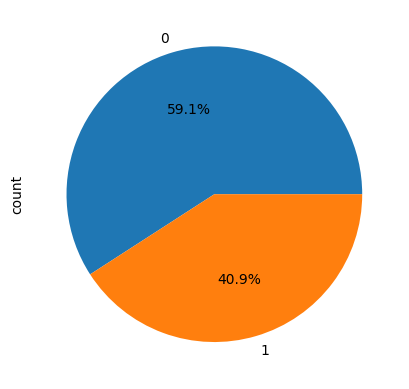

In [19]:
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%0.1f%%')

# MultiColumn Analysis

## Age/Gender

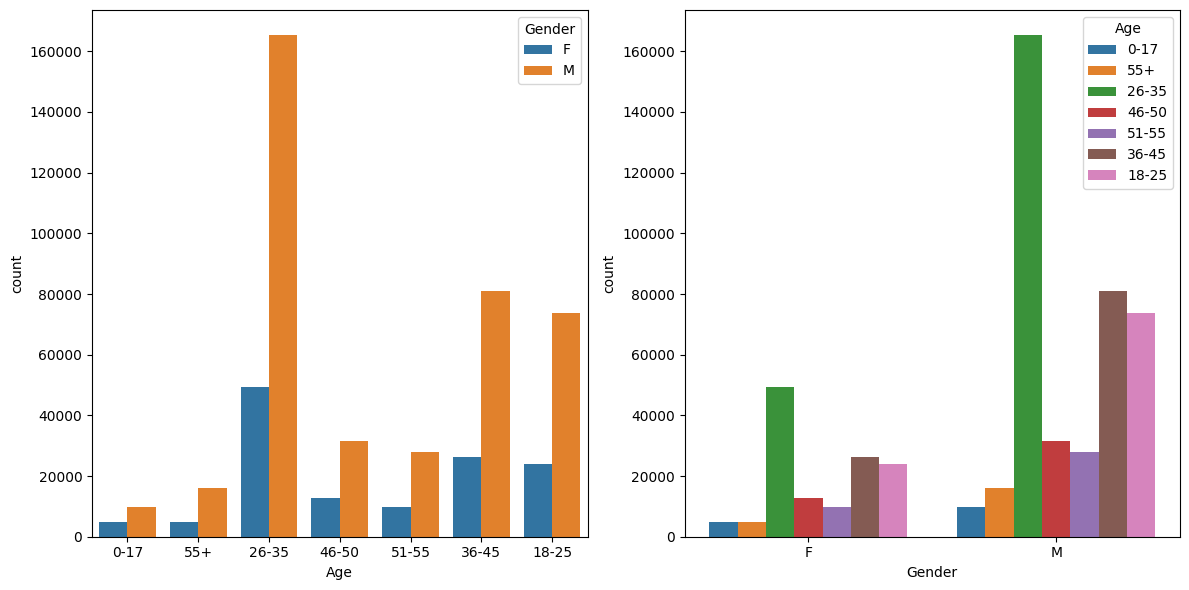

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Age', hue='Gender')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', hue='Age')
plt.tight_layout()

## Gender/Marital Status

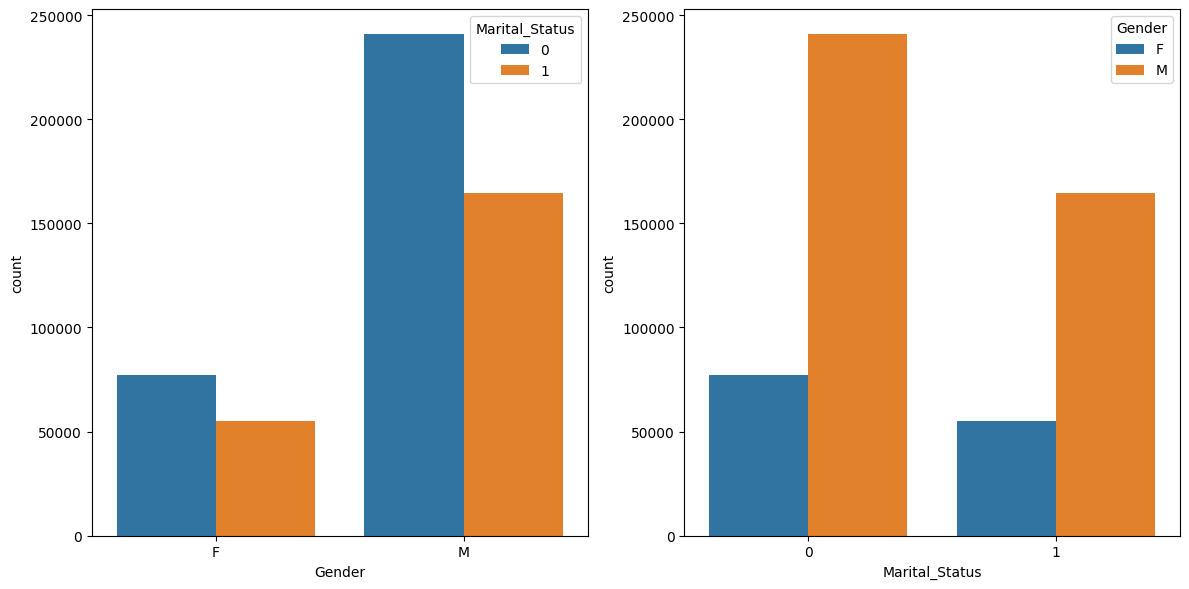

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', hue='Marital_Status')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.tight_layout()

## City Category Analysis

<Axes: xlabel='City_Category', ylabel='count'>

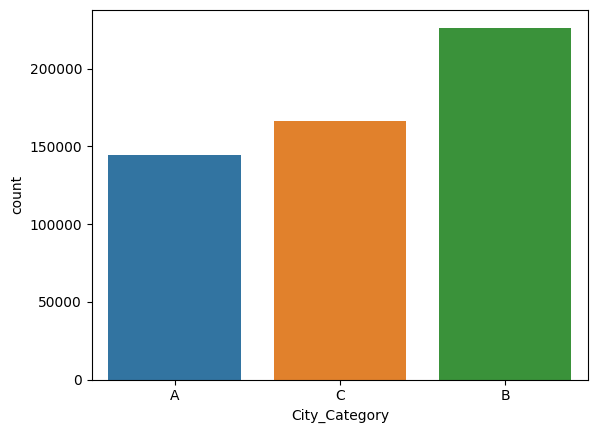

In [22]:
sns.countplot(x=df['City_Category'], hue=df['City_Category'])

<Axes: ylabel='count'>

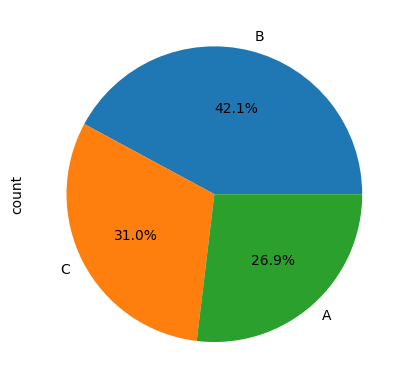

In [23]:
df['City_Category'].value_counts().plot(kind='pie', autopct='%.1f%%')

### City Category/Age

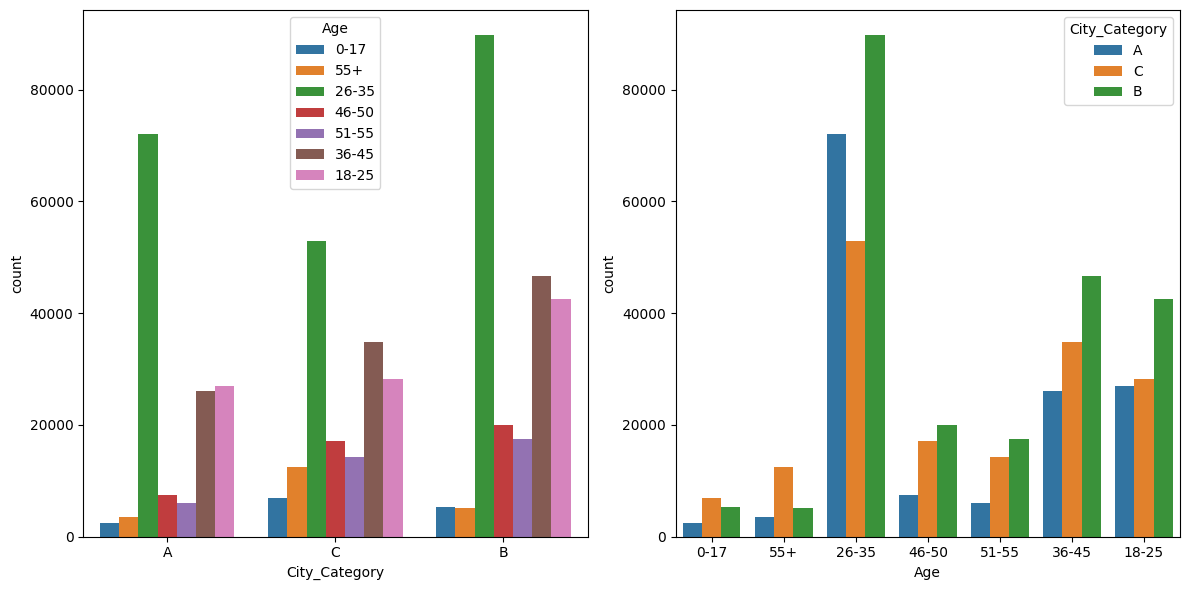

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='City_Category', hue='Age')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Age', hue='City_Category')
plt.tight_layout()

### Marital Status/City Category

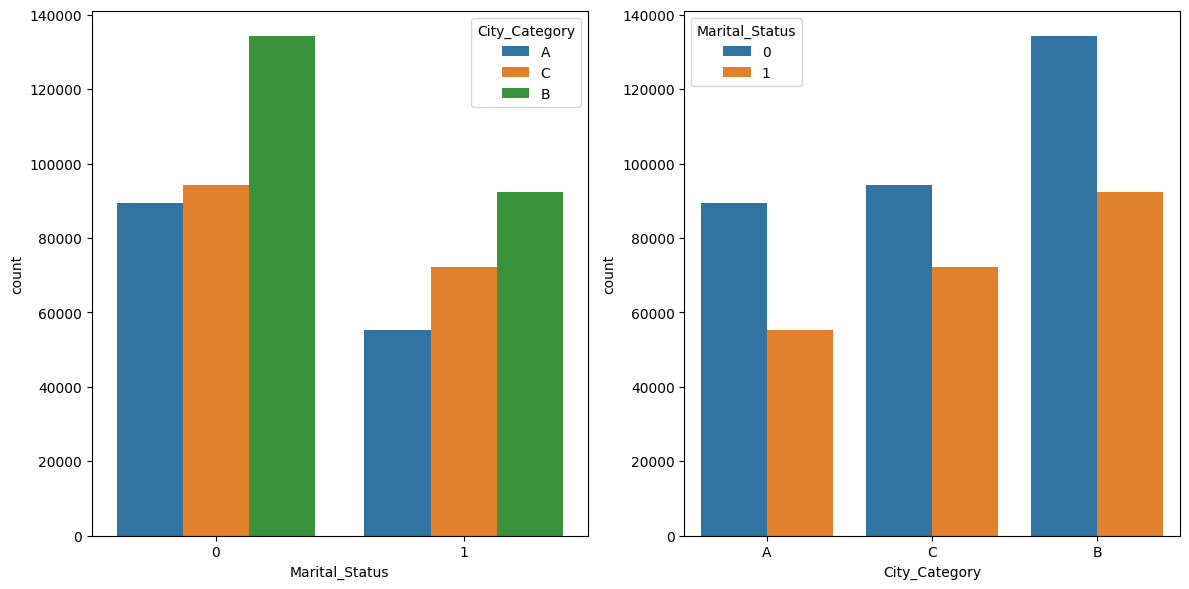

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Marital_Status', hue='City_Category')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='City_Category', hue='Marital_Status')
plt.tight_layout()

### City Category/Gender

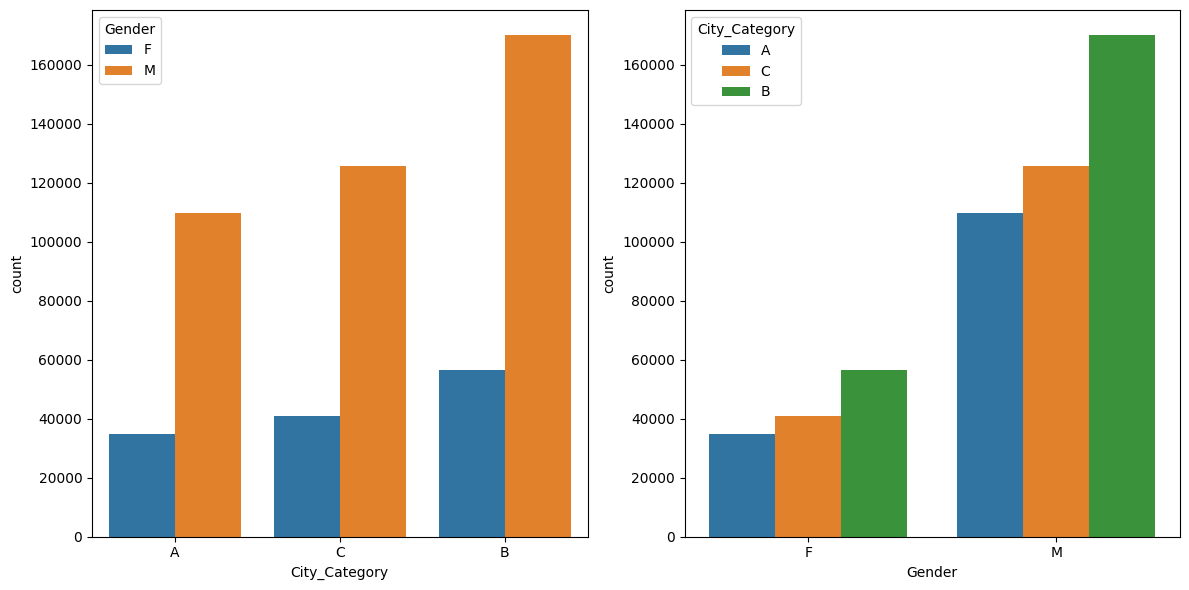

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='City_Category', hue='Gender')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', hue='City_Category')
plt.tight_layout()

### City Category/Purchase

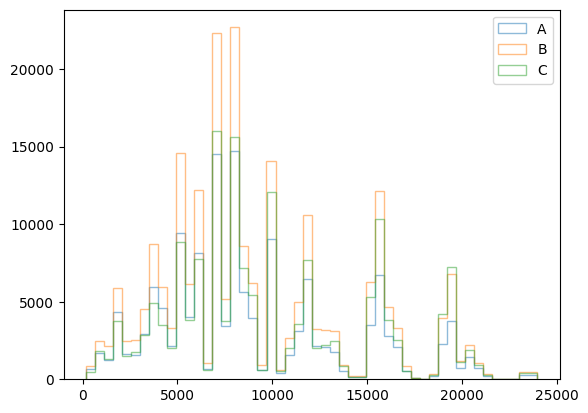

In [27]:
for name, group in df.groupby('City_Category'):
    plt.hist(group['Purchase'], bins=50, alpha=0.5, label=name, histtype='step')
plt.legend()

<Axes: ylabel='Purchase'>

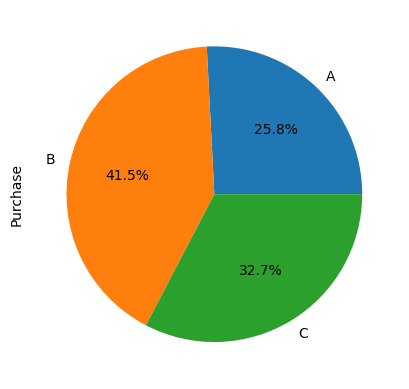

In [28]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie', autopct='%.1f%%')

<Axes: ylabel='Purchase'>

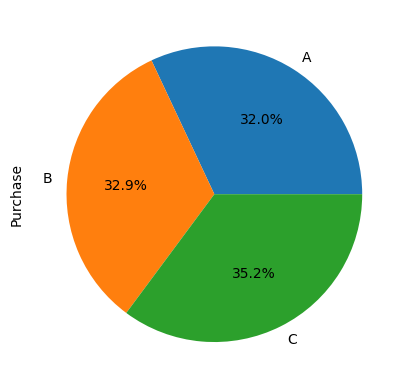

In [29]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct='%.1f%%')

# Occupation and Products Analysis

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Stay In Current City Years

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

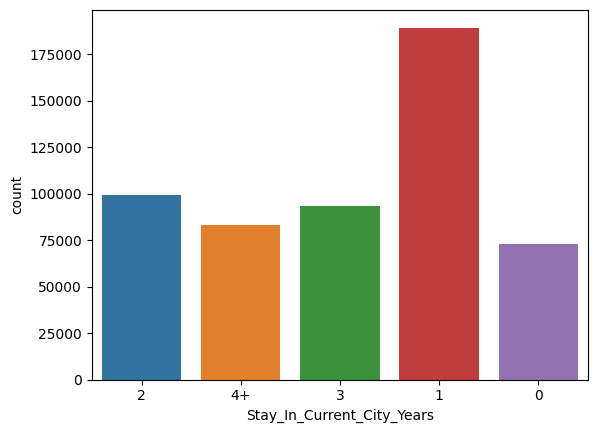

In [31]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['Stay_In_Current_City_Years'])

<Axes: ylabel='count'>

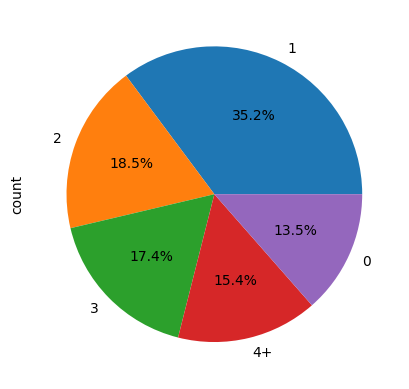

In [32]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='pie', autopct='%.1f%%')

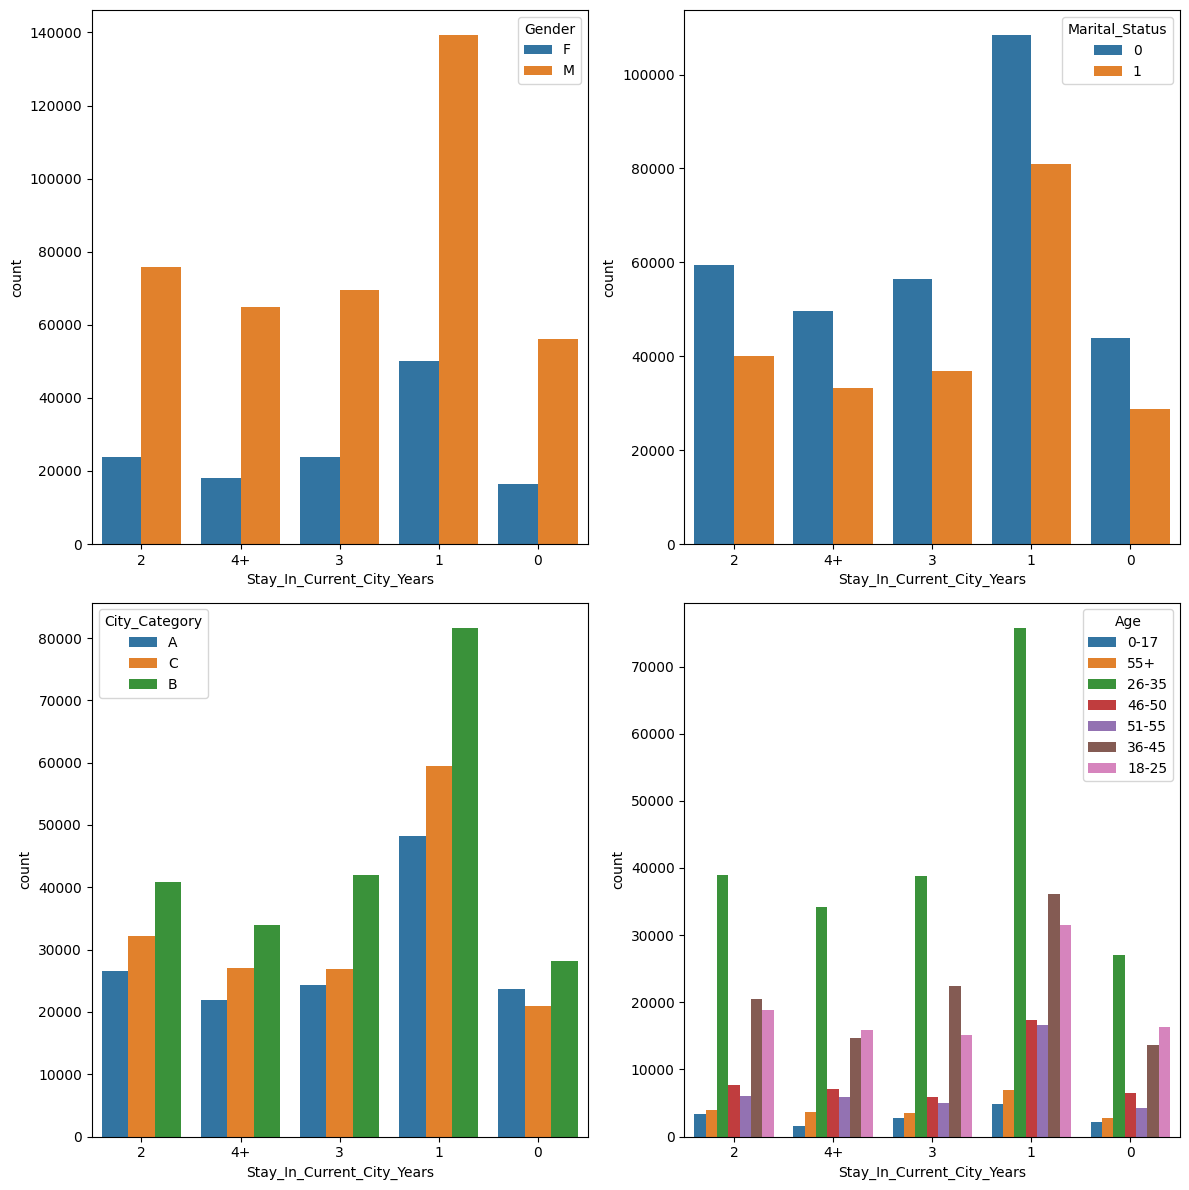

In [33]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Gender'])

plt.subplot(2, 2, 2)
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Status'])

plt.subplot(2, 2, 3)
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['City_Category'])

plt.subplot(2, 2, 4)
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Age'])

plt.tight_layout()

<Axes: xlabel='Stay_In_Current_City_Years'>

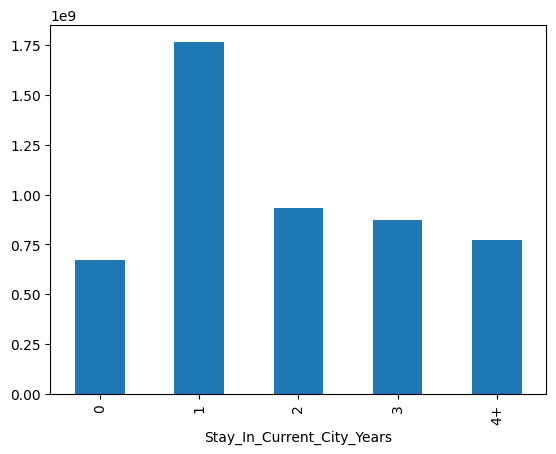

In [34]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

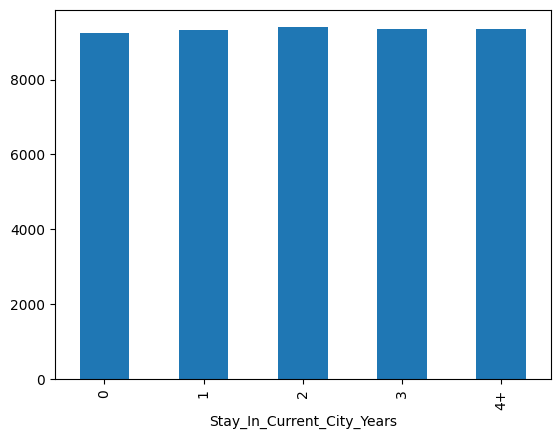

In [35]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar')

## Occupation

<Axes: xlabel='Occupation', ylabel='count'>

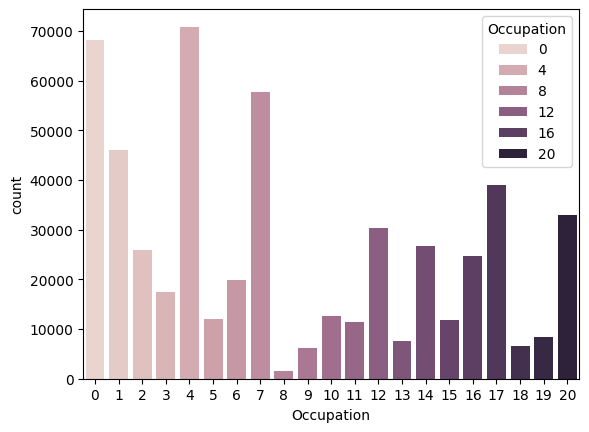

In [36]:
sns.countplot(x=df['Occupation'], hue=df['Occupation'])

<Axes: xlabel='Occupation'>

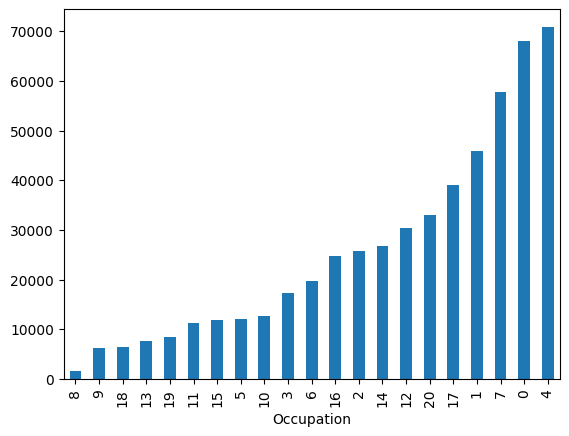

In [37]:
df['Occupation'].value_counts(ascending=True).plot(kind='bar')

<Axes: xlabel='Occupation'>

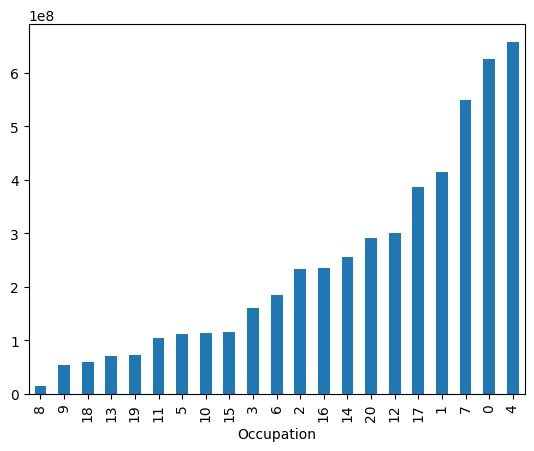

In [38]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

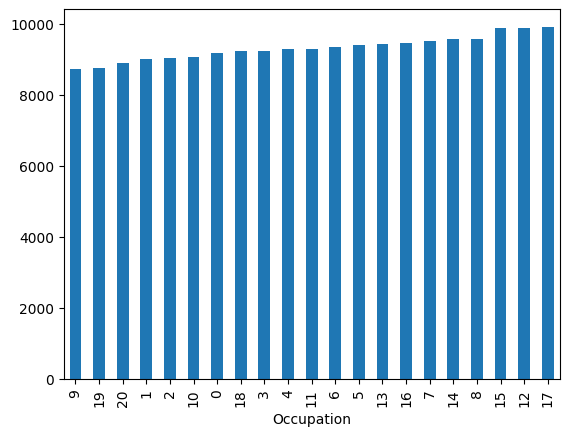

In [39]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

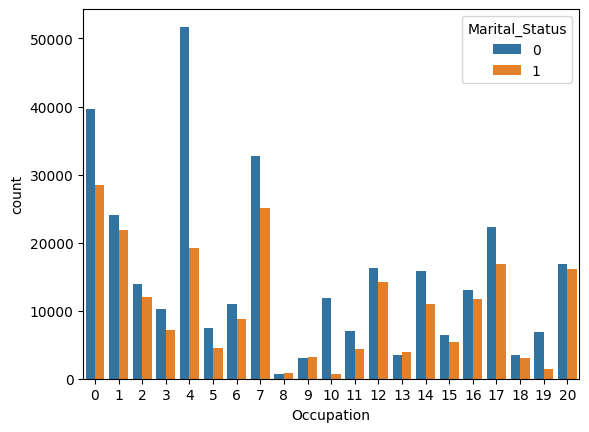

In [40]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

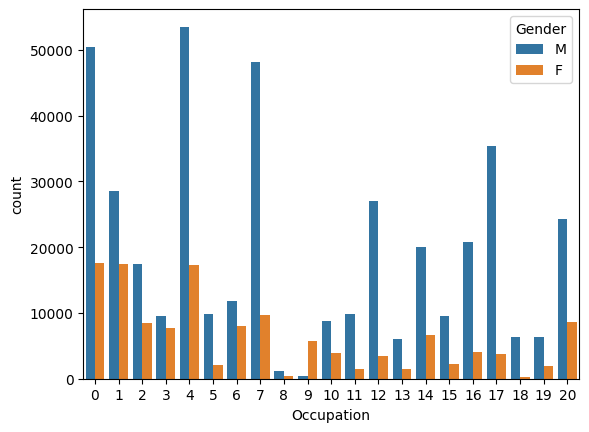

In [41]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

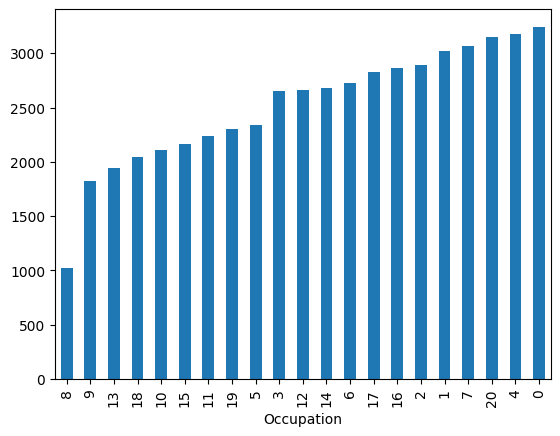

In [42]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

## Products

<Axes: xlabel='Product_Category_1'>

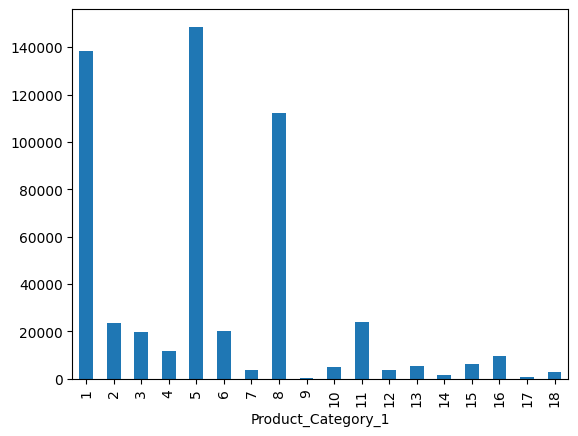

In [43]:
df['Product_Category_1'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

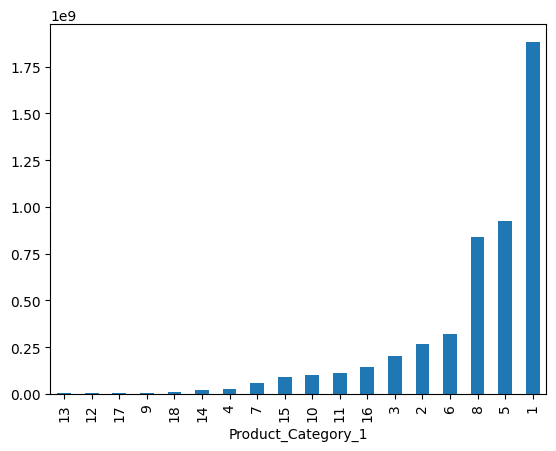

In [44]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

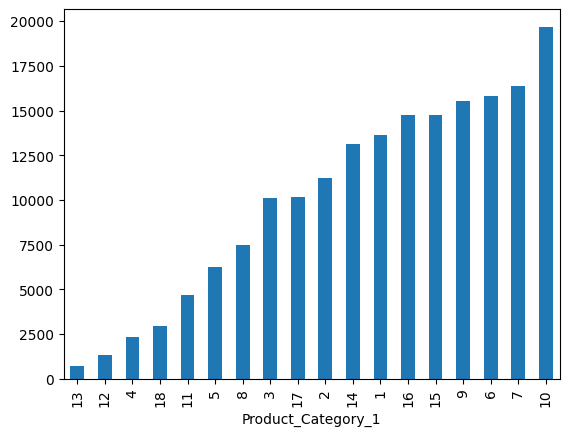

In [45]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

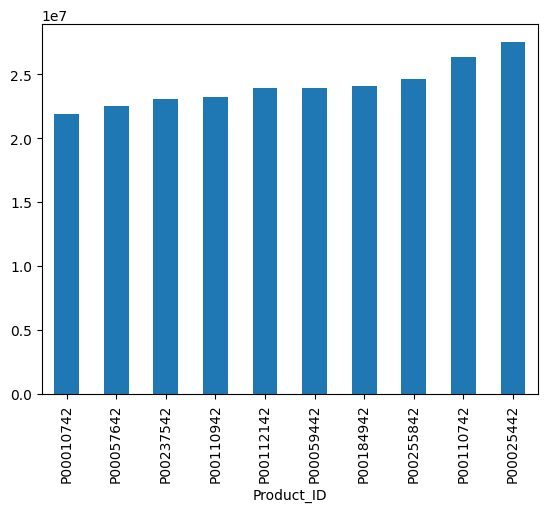

In [46]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

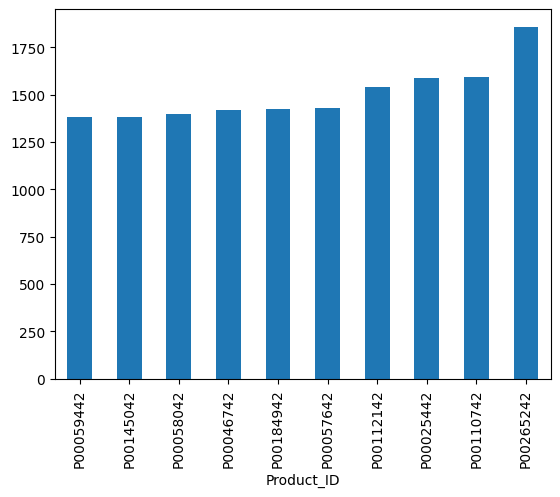

In [47]:
df.groupby('Product_ID')['Purchase'].size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

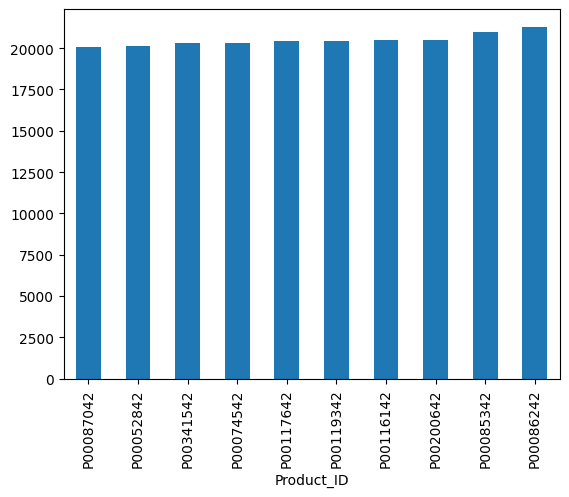

In [48]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

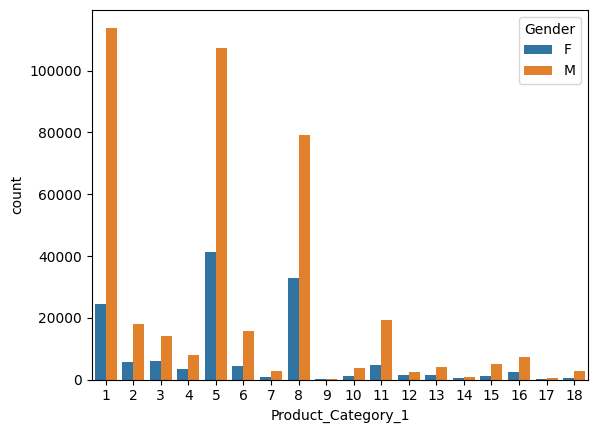

In [49]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

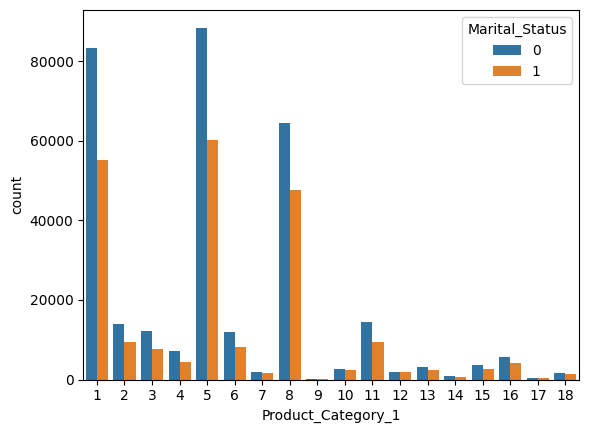

In [50]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

# Age & Marital Status

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [52]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

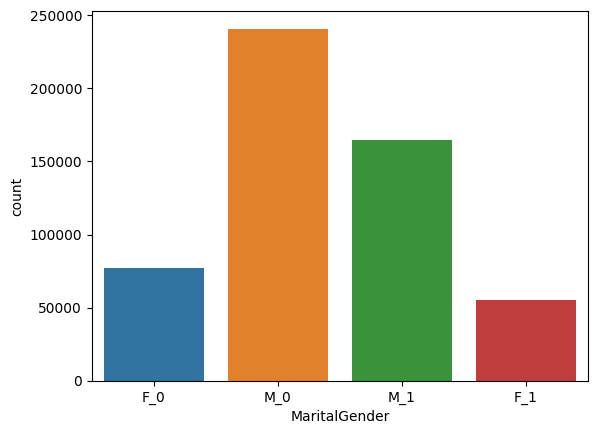

In [54]:
sns.countplot(x=df['MaritalGender'], hue=df['MaritalGender'])

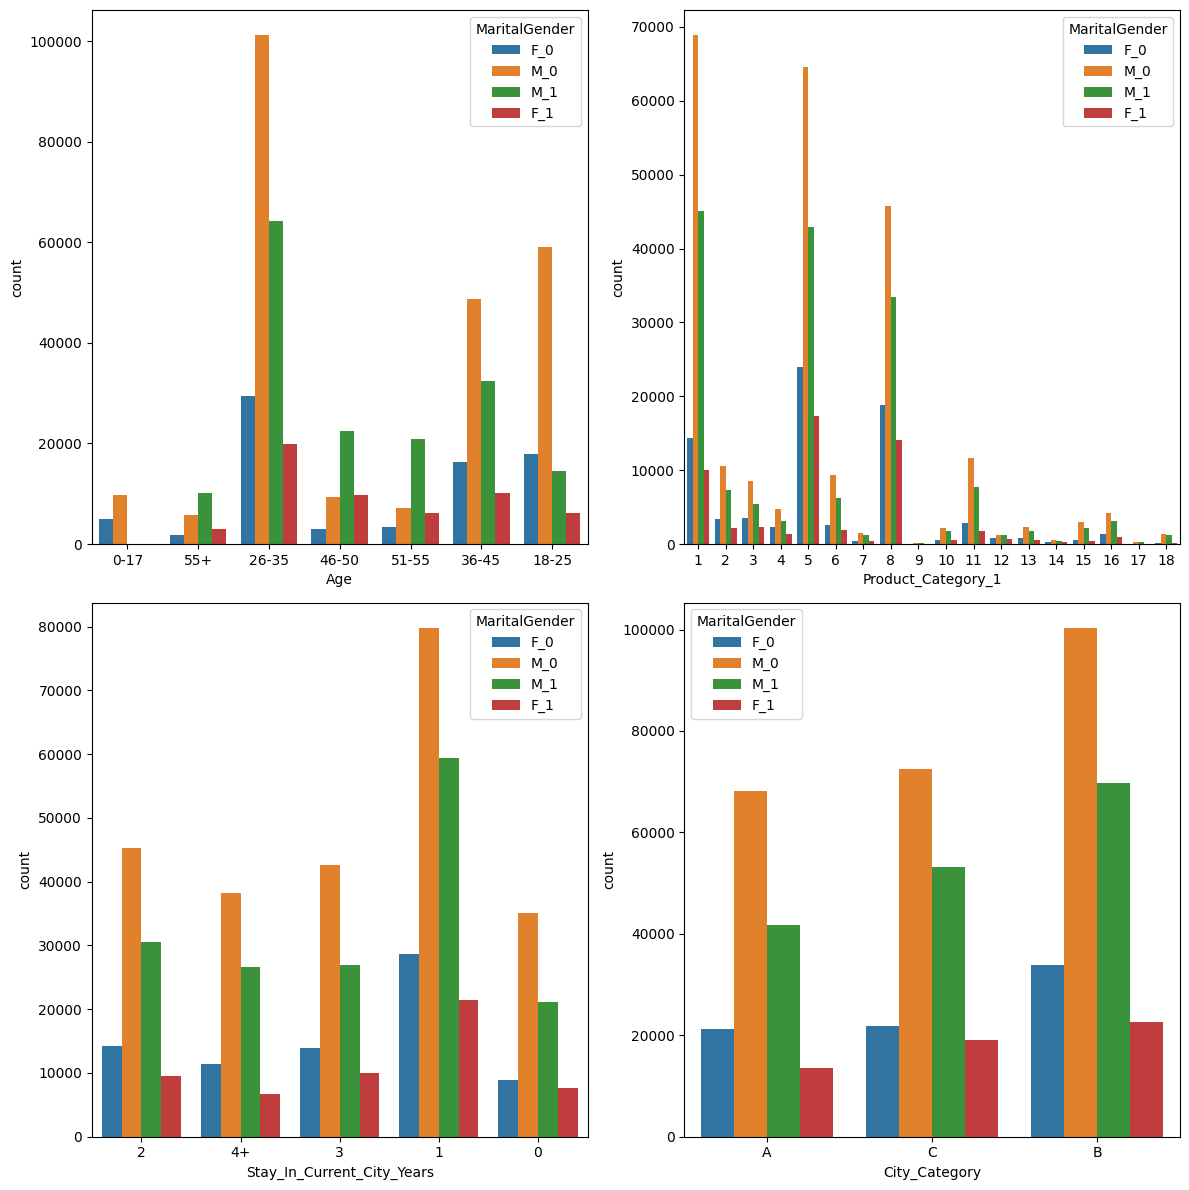

In [55]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

plt.subplot(2, 2, 2)
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

plt.subplot(2, 2, 3)
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

plt.subplot(2, 2, 4)
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])

plt.tight_layout()